In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

from world import World
from utils import plotarrows, getpolicy, getvalue

plt.rcParams['figure.facecolor']='white'

In [2]:
which_world = 1 #Change later. Valid options: [1-4]

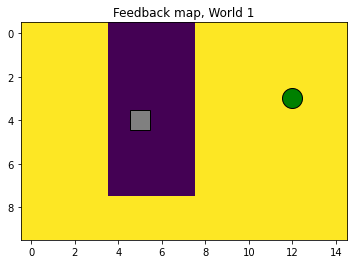

In [3]:
# Initialization
# Initialize the world, Q-table, and hyperparameters

# Init world and draw
world = World(which_world)
world.draw()

# Init Q-table
x_size = world.x_size # 15
y_size = world.y_size # 10
n_actions = 4 # up, down, left ,right

## Init q_table to ZEROES
#q_table = np.zeros((y_size, x_size, n_actions)) # We start with 0 for now: lecturer says small value... Why? Slow training
# Init q_table to -1/10
q_table = (-1/10)*np.ones((y_size, x_size, n_actions)) # Lets try small negative values everywhere. Right now we have no feedback/reward

with np.nditer(q_table, op_flags=['readwrite']) as it:
    for x in it:
        x[...] -= np.random.random() / 10
# Set actions in terminal node to 100 
#q_table[world.term[0], world.term[1]] = 100

#q_table = np.random.rand(y_size, x_size, n_actions)



# for when the agent achieves the goal... world.feed doesnt have a positive reward in terminal state. This is strange. I do manual reward then

# Init hyperparams
lr = 0.25 # Recommended start lr [0.1, 0.5]
discount = 0.9 # Recommended start at 0.9
epsilon = 0.9 # Higher epsilon focus on exploration, lower on exploitation
n_episodes = 5 #1000 # Number of iterations


In [4]:
#print(f"Starting position: {world.pos}")
#print(f"Feed map matrix: {world.feed}")
#print(f"Goal position. {world.term}")
#print(f"Max reward: {np.max(world.feed)}")
#print(f"Q-TABLE: {q_table}")

Reached terminal node at (3, 12) 
 Gained reward is 100


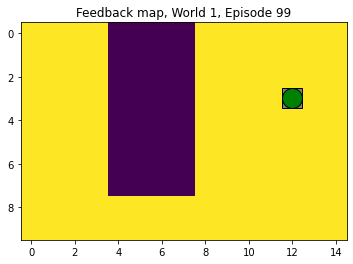

In [5]:
def greedy_exploration(current_loc, epsilon = epsilon):
    """Function to implement epsilon-greedy exploration"""
    if np.random.random() < epsilon: # Random action
        return np.random.randint(4) + 1 # Generate integer between 1 and 4
    else: #Greedy action
        return np.argmax(q_table[current_loc[0],current_loc[1]]) + 1

n_episodes = 100
### The training loop
for episode in range(n_episodes):
    if episode != 0: # If not first episode -> init a new world
        world = World(which_world)
    # Find current position at start of new episode
    current_location = world.pos
    
    print(f"Episode: {episode}")
    while world.pos != world.term: # While not in a terminal state do
        previous_location = world.pos
        # Decide which action to take
        action = greedy_exploration(current_location, epsilon)
        # Take the action
        action_data = world.action(action)
        world.draw(episode = episode)
        # Get new location
        current_location = world.pos
        # Get the reward for moving to the new location
        if action_data[0] == 0:
            reward = -100 # If invalid action then negative reward
        else:
            reward = action_data[1] # else actual reward
            
        if world.pos == world.term:
            reward = 100 # Big reward if hit terminal
            print(f"Reached terminal node at {world.pos} \n Gained reward is {reward}")
        # Compute the q_val in previous location given the action we made
        prev_q_val = q_table[previous_location[0], previous_location[1], action-1]
        # Compute temporal difference
        temp_diff = reward + (discount * np.max(q_table[current_location[0], current_location[1]])) - prev_q_val
        # Compute the new q value
        updated_q_val = prev_q_val + (lr * temp_diff)
        # Update the qtable with the new q value for the previous location
        q_table[previous_location[0], previous_location[1], action-1] = updated_q_val
    
    # Decrease exploration over the episodes
    epsilon = epsilon * 0.95
        

In [45]:
pol

array([[-4.42484974e-01, -4.33172866e-01, -4.25821319e-01,
        -4.39383900e-01, -1.98304907e-01, -1.11062500e+00,
        -1.73594922e+00, -2.28589944e-01, -1.84146484e-01,
        -1.60890625e-01, -1.39375000e-01, -1.22500000e-01,
        -1.00000000e-01, -1.22500000e-01, -1.39375000e-01],
       [-4.39074090e-01, -4.29293413e-01, -4.28773427e-01,
        -4.31941756e-01, -3.51887892e-01, -1.66285937e+00,
        -1.11062500e+00, -1.69528516e-01, -1.88133203e-01,
        -1.52031250e-01, -1.44437500e-01, -1.22500000e-01,
         1.05537500e+01, -1.00000000e-01, -1.22500000e-01],
       [-4.28240725e-01, -4.23735084e-01, -4.19927071e-01,
        -4.25645426e-01, -2.57296418e-01, -1.70318403e+00,
        -9.04890625e-01, -1.22500000e-01, -1.77027344e-01,
        -1.44437500e-01, -1.44437500e-01,  2.45884766e+01,
         1.29851172e+02,  1.85904687e+01, -1.00000000e-01],
       [-4.31367410e-01, -4.31087986e-01, -4.27694661e-01,
        -4.21086396e-01, -3.73696858e-01, -1.97958203

In [46]:
pol[1][1]

-0.42929341329702514

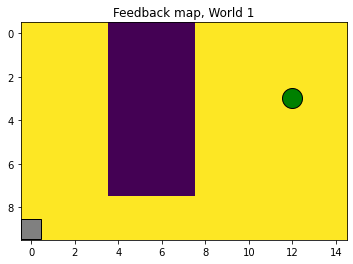

In [ ]:
# Test loop
# Test the agent (subjectively) by letting it use the optimal policy to traverse the gridworld.
# Do not update the Q-table when testing.
# Also, you should not explore when testing, i.e. epsilon=0; always pick the optimal action.
epsilon = 0


world = World(which_world)
pol = getpolicy(q_table)

while world.pos != world.term: # While not in a terminal state do
    current_location = world.pos # Get current position position
    action = greedy_exploration(current_location, epsilon)
    # Take the action
    action_data = world.action(action)
    world.draw(policy = pol)

    